In [1]:
# Import modules and libraries needed

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from matplotlib.pyplot import subplots, show
from pprint import pprint
import json
from matplotlib.pyplot import figure
import hvplot.pandas
import geoviews as gv

# Import API key
from api_keys import geoapify_key

In [2]:
# Read and display data stored in CSV File

csvfile = pd.read_csv('MLS.csv')
mls_df=pd.DataFrame(csvfile)
mls_df.head()

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
0,Adjala-Tosorontio,143.7,510000.0,12.00,143.7,510000.0,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-01
1,Adjala-Tosorontio,140.8,499700.0,13.82,140.8,499700.0,13.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-01
2,Adjala-Tosorontio,142.7,506400.0,15.83,142.7,506400.0,15.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-01
3,Adjala-Tosorontio,138.4,491100.0,11.08,138.4,491100.0,11.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-01
4,Adjala-Tosorontio,145.4,516000.0,16.51,145.4,516000.0,16.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-01


In [3]:
#  Data Clean up, dropped rows where null values in composite data
mls_df_clean = mls_df.dropna(subset='CompIndex')

In [4]:
# Filter to retain rows of interest
mls_df_clean=mls_df_clean[['Location','CompBenchmark','SFDetachBenchmark','SFAttachBenchmark','THouseBenchmark','ApartBenchmark','Date']]
mls_df_clean.Date = pd.to_datetime(mls_df_clean.Date)
mls_df_clean.head()

,Location,CompBenchmark,SFDetachBenchmark,SFAttachBenchmark,THouseBenchmark,ApartBenchmark,Date
0,Adjala-Tosorontio,510000.0,510000.0,NaN,NaN,NaN,2015-07-01
1,Adjala-Tosorontio,499700.0,499700.0,NaN,NaN,NaN,2015-08-01
2,Adjala-Tosorontio,506400.0,506400.0,NaN,NaN,NaN,2015-09-01
3,Adjala-Tosorontio,491100.0,491100.0,NaN,NaN,NaN,2015-10-01
4,Adjala-Tosorontio,516000.0,516000.0,NaN,NaN,NaN,2015-11-01


In [5]:
mls_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5076 entries, 0 to 5090
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Location           5076 non-null   object        
 1   CompBenchmark      5076 non-null   float64       
 2   SFDetachBenchmark  5076 non-null   float64       
 3   SFAttachBenchmark  4949 non-null   float64       
 4   THouseBenchmark    3803 non-null   float64       
 5   ApartBenchmark     4010 non-null   float64       
 6   Date               5076 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 317.2+ KB


In [10]:
min_df=mls_df_clean.groupby(['Location','Date']).min()

In [11]:
min_df.head()

CompBenchmark  SFDetachBenchmark  \
Location          Date                                           
Adjala-Tosorontio 2015-07-01       510000.0           510000.0   
                  2015-08-01       499700.0           499700.0   
                  2015-09-01       506400.0           506400.0   
                  2015-10-01       491100.0           491100.0   
                  2015-11-01       516000.0           516000.0   

                              SFAttachBenchmark  THouseBenchmark  \
Location          Date                                             
Adjala-Tosorontio 2015-07-01                NaN              NaN   
                  2015-08-01                NaN              NaN   
                  2015-09-01                NaN              NaN   
                  2015-10-01                NaN              NaN   
                  2015-11-01                NaN              NaN   

                              ApartBenchmark  
Location          Date                        
Adjala-Tosorontio 2015-07-01             NaN  
                  2015-08-01             NaN  
                  2015-09-01             NaN  
                  2015-10-01             NaN  
                  2015-11-01             NaN

In [12]:
type(min_df)

pandas.core.frame.DataFrame

In [ ]:
# Analysis of Detached Houses 

In [14]:
# Extract location wise maximum house prices for detached houses and retain only first row for max
DetachMax  = mls_df_clean[["Location","SFDetachBenchmark","Date"]]
DetachMax =DetachMax.sort_values(["Location","SFDetachBenchmark"], ascending=False)
DetachMax =DetachMax.groupby("Location").first().reset_index()
DetachMax

,Location,SFDetachBenchmark,Date
0,Adjala-Tosorontio,981800.0,2021-03-01
1,Ajax,911300.0,2021-03-01
2,Aurora,1218800.0,2021-03-01
3,Bradford West,816600.0,2017-05-01
4,Bradford West Gwillimbury,953200.0,2021-01-01
...,...,...,...
71,Uxbridge,982700.0,2021-03-01
72,Vaughan,1286100.0,2021-03-01
73,Whitby,986800.0,2021-03-01
74,Whitchurch-Stouffville,1269300.0,2021-03-01


In [15]:
# Extract location wise minimum prices for detached houses and retain only first row
DetachMin  = mls_df_clean[["Location","SFDetachBenchmark","Date"]]
DetachMin =DetachMin.sort_values(["Location","SFDetachBenchmark"], ascending=True)
DetachMin =DetachMin.groupby("Location").first().reset_index()
DetachMin

,Location,SFDetachBenchmark,Date
0,Adjala-Tosorontio,491100.0,2015-10-01
1,Ajax,478900.0,2015-07-01
2,Aurora,718900.0,2015-07-01
3,Bradford West,510600.0,2015-07-01
4,Bradford West Gwillimbury,644800.0,2020-01-01
...,...,...,...
71,Uxbridge,490900.0,2015-09-01
72,Vaughan,803000.0,2015-07-01
73,Whitby,497800.0,2015-07-01
74,Whitchurch-Stouffville,773600.0,2015-07-01


In [16]:
# Merge the two datasets to get data in one df and calculate ratio to get number of times property prices multiplied

Detach = DetachMax.merge(DetachMin,on='Location',how='left',suffixes=('_Max', '_Min'))

Detach['Ratio']=Detach['SFDetachBenchmark_Max']/Detach['SFDetachBenchmark_Min']

Detach

,Location,SFDetachBenchmark_Max,Date_Max,SFDetachBenchmark_Min,Date_Min,Ratio
0,Adjala-Tosorontio,981800.0,2021-03-01,491100.0,2015-10-01,1.999186
1,Ajax,911300.0,2021-03-01,478900.0,2015-07-01,1.902902
2,Aurora,1218800.0,2021-03-01,718900.0,2015-07-01,1.695368
3,Bradford West,816600.0,2017-05-01,510600.0,2015-07-01,1.599295
4,Bradford West Gwillimbury,953200.0,2021-01-01,644800.0,2020-01-01,1.478288
...,...,...,...,...,...,...
71,Uxbridge,982700.0,2021-03-01,490900.0,2015-09-01,2.001833
72,Vaughan,1286100.0,2021-03-01,803000.0,2015-07-01,1.601619
73,Whitby,986800.0,2021-03-01,497800.0,2015-07-01,1.982322
74,Whitchurch-Stouffville,1269300.0,2021-03-01,773600.0,2015-07-01,1.640770


In [17]:
# Filter for locations where price doubled or more
Detach=Detach[Detach['Ratio']>=2]

# Calculate time taken for prices to double or more
Detach['Duration']=Detach['Date_Max']-Detach['Date_Min']
Detach_Final =Detach[['Location','Ratio','Duration']]
Detach_Final.sort_values('Ratio', ascending =False)

/var/folders/9b/5zr1_pkn3szbykw53vkw4vx40000gn/T/ipykernel_82699/4260699239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Detach['Duration']=Detach['Date_Max']-Detach['Date_Min']


,Location,Ratio,Duration
42,Toronto C08,4.113545,1978 days
20,Innisfil,2.532242,2070 days
11,Dufferin County,2.221664,2070 days
28,Orangeville,2.221664,2070 days
29,Oshawa,2.175398,2070 days
34,Simcoe County,2.139006,2070 days
10,Clarington,2.138004,2008 days
23,Milton,2.113160,2008 days
18,Halton Hills,2.068779,2008 days
6,Brock,2.056349,2070 days


In [18]:
# Extract the number of days by converting format and then convert to number of years 
Detach_Final['Duration']=Detach_Final['Duration'].astype('string')
Detach_Final[['No of days','days']]=Detach_Final.Duration.str.split(expand = True)
Detach_Final['No of days']=Detach_Final['No of days'].astype('int64')
Detach_Final=Detach_Final[['Location','Ratio','No of days']]
Detach_Final['No of Years']=Detach_Final['No of days']/365

# set size for bubbles for better optics
size1=(Detach_Final['Ratio'])*400

/var/folders/9b/5zr1_pkn3szbykw53vkw4vx40000gn/T/ipykernel_82699/3426028582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Detach_Final['Duration']=Detach_Final['Duration'].astype('string')
/var/folders/9b/5zr1_pkn3szbykw53vkw4vx40000gn/T/ipykernel_82699/3426028582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Detach_Final[['No of days','days']]=Detach_Final.Duration.str.split(expand = True)
/var/folders/9b/5zr1_pkn3szbykw53vkw4vx40000gn/T/ipykernel_82699/3426028582.py:2: SettingWithCopyWarning: 

In [61]:
# # plot the data for Detached houses
# size=size*150
# x2=Detach_Final['Location']
# y=Detach_Final['No of Years']
# plt.scatter(x2,y, marker="o",s=size,facecolors='green',alpha=0.75)
# plt.xlabel('Areas')
# plt.ylabel('Years')
# plt.xticks(rotation = 90)
# plt.show()
# # fig = plt.figure(figsize=(18, 9))
# # figure(figsize=(12, 8), dpi=80)

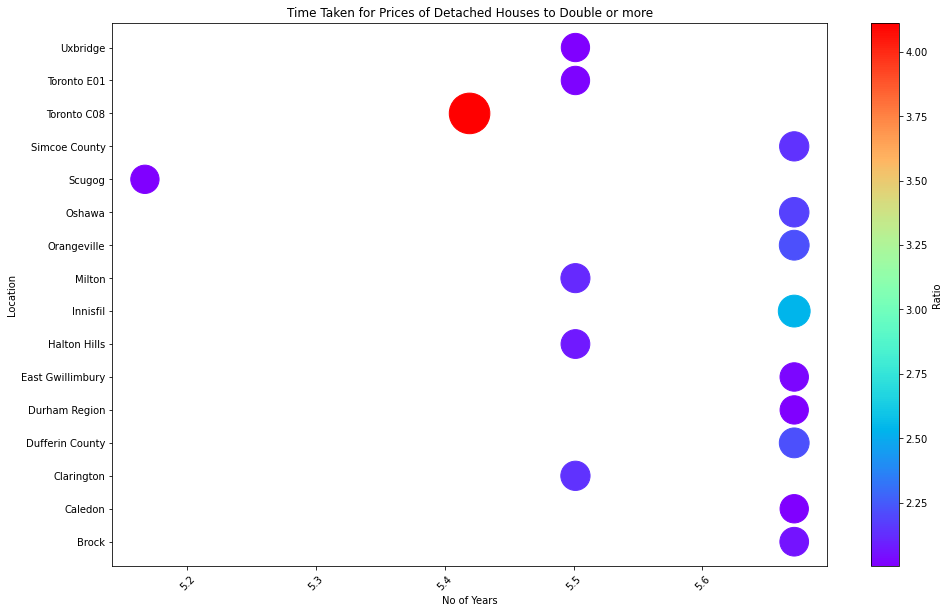

In [74]:
# plot the figure
Detach_Final.plot(kind="scatter", x="No of Years",y="Location", figsize=(16,10),title="Time Taken for Prices of Detached Houses to Double or more", rot=45, style="o", c='Ratio', colormap='rainbow',s=size1, sharex=False)

# save the figure
plt.savefig("Images/Detached_Houses.png")

# display the figure
plt.show()

In [ ]:
# Analysis of Attached Houses

In [51]:
AttachMax  = mls_df_clean[["Location","SFAttachBenchmark","Date"]]
AttachMax  = AttachMax .sort_values(["Location","SFAttachBenchmark"], ascending=False)
AttachMax = AttachMax .groupby("Location").first().reset_index()
AttachMax

,Location,SFAttachBenchmark,Date
0,Adjala-Tosorontio,NaN,2015-07-01
1,Ajax,773000.0,2021-03-01
2,Aurora,872900.0,2021-03-01
3,Bradford West,615800.0,2017-05-01
4,Bradford West Gwillimbury,782800.0,2021-03-01
...,...,...,...
71,Uxbridge,771300.0,2021-03-01
72,Vaughan,1001400.0,2021-03-01
73,Whitby,787800.0,2021-03-01
74,Whitchurch-Stouffville,872500.0,2021-03-01


In [52]:
AttachMin = mls_df_clean[["Location","SFAttachBenchmark","Date"]]
AttachMin = AttachMin.sort_values(["Location","SFAttachBenchmark"], ascending=True)
AttachMin = AttachMin.groupby("Location").first().reset_index()
AttachMin

,Location,SFAttachBenchmark,Date
0,Adjala-Tosorontio,NaN,2015-07-01
1,Ajax,402400.0,2015-07-01
2,Aurora,523400.0,2015-07-01
3,Bradford West,390200.0,2015-07-01
4,Bradford West Gwillimbury,578600.0,2020-02-01
...,...,...,...
71,Uxbridge,369500.0,2015-09-01
72,Vaughan,627700.0,2015-07-01
73,Whitby,387800.0,2015-07-01
74,Whitchurch-Stouffville,507100.0,2015-07-01


/var/folders/9b/5zr1_pkn3szbykw53vkw4vx40000gn/T/ipykernel_82699/1520530108.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Attach_Final['Duration']=Attach_Final['Duration'].astype('string')
/var/folders/9b/5zr1_pkn3szbykw53vkw4vx40000gn/T/ipykernel_82699/1520530108.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Attach_Final[['No of days','days']]=Attach_Final.Duration.str.split(expand = True)
/var/folders/9b/5zr1_pkn3szbykw53vkw4vx40000gn/T/ipykernel_82699/1520530108.py:10: SettingWithCopyWarning

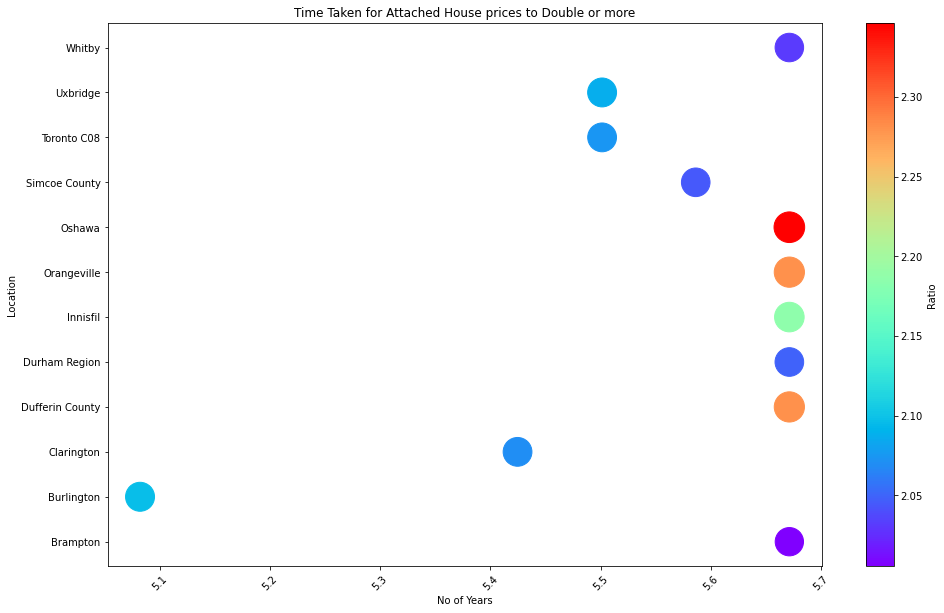

In [77]:
Attach = AttachMax.merge(AttachMin,on='Location',how='left',suffixes=('_Max', '_Min'))
Attach
Attach['Ratio']= Attach['SFAttachBenchmark_Max']/ Attach['SFAttachBenchmark_Min']

Attach=Attach[Attach['Ratio']>=2]
Attach['Duration']=Attach['Date_Max']-Attach['Date_Min']
Attach_Final =Attach[['Location','Ratio','Duration']]
Attach_Final.sort_values('Ratio', ascending =False)
Attach_Final['Duration']=Attach_Final['Duration'].astype('string')
Attach_Final[['No of days','days']]=Attach_Final.Duration.str.split(expand = True)
Attach_Final['No of days']=Attach_Final['No of days'].astype('int64')
Attach_Final=Attach_Final[['Location','Ratio','No of days']]
Attach_Final['No of Years']=Attach_Final['No of days']/365
size_Attach=(Attach_Final['Ratio'])*400
Attach_Final.plot(kind="scatter", x="No of Years",y="Location", figsize=(16,10),title="Time Taken for Attached House prices to Double or more", rot=45, style="o", c='Ratio', colormap='rainbow',s=size_Attach,sharex=False)
plt.savefig("Images/Attached_Houses.png")
plt.show()

In [25]:
mls_df_clean[:1]

,Location,CompBenchmark,SFDetachBenchmark,SFAttachBenchmark,THouseBenchmark,ApartBenchmark,Date
0,Adjala-Tosorontio,510000.0,510000.0,NaN,NaN,NaN,2015-07-01


In [ ]:
# Analysis of TownHouses

In [26]:
THouseMax  = mls_df_clean[["Location","THouseBenchmark","Date"]]
THouseMax  = THouseMax.sort_values(["Location","THouseBenchmark"], ascending=False)
THouseMax = THouseMax.groupby("Location").first().reset_index()
THouseMax

,Location,THouseBenchmark,Date
0,Adjala-Tosorontio,NaN,2015-07-01
1,Ajax,653200.0,2021-03-01
2,Aurora,831700.0,2021-03-01
3,Bradford West,NaN,2015-07-01
4,Bradford West Gwillimbury,NaN,2020-01-01
...,...,...,...
71,Uxbridge,NaN,2015-07-01
72,Vaughan,911100.0,2021-03-01
73,Whitby,546400.0,2021-03-01
74,Whitchurch-Stouffville,501200.0,2021-03-01


In [27]:
THouseMin  = mls_df_clean[["Location","THouseBenchmark","Date"]]
THouseMin  = THouseMin.sort_values(["Location","THouseBenchmark"], ascending=True)
THouseMin = THouseMin.groupby("Location").first().reset_index()
THouseMin

,Location,THouseBenchmark,Date
0,Adjala-Tosorontio,NaN,2015-07-01
1,Ajax,311400.0,2015-08-01
2,Aurora,380200.0,2015-07-01
3,Bradford West,NaN,2015-07-01
4,Bradford West Gwillimbury,NaN,2020-01-01
...,...,...,...
71,Uxbridge,NaN,2015-07-01
72,Vaughan,522000.0,2016-01-01
73,Whitby,284200.0,2015-07-01
74,Whitchurch-Stouffville,368700.0,2018-03-01


/var/folders/9b/5zr1_pkn3szbykw53vkw4vx40000gn/T/ipykernel_82699/3476266151.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  THouse_Final['Duration']=THouse_Final['Duration'].astype('string')
/var/folders/9b/5zr1_pkn3szbykw53vkw4vx40000gn/T/ipykernel_82699/3476266151.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  THouse_Final[['No of days','days']]=THouse_Final.Duration.str.split(expand = True)
/var/folders/9b/5zr1_pkn3szbykw53vkw4vx40000gn/T/ipykernel_82699/3476266151.py:9: SettingWithCopyWarning: 

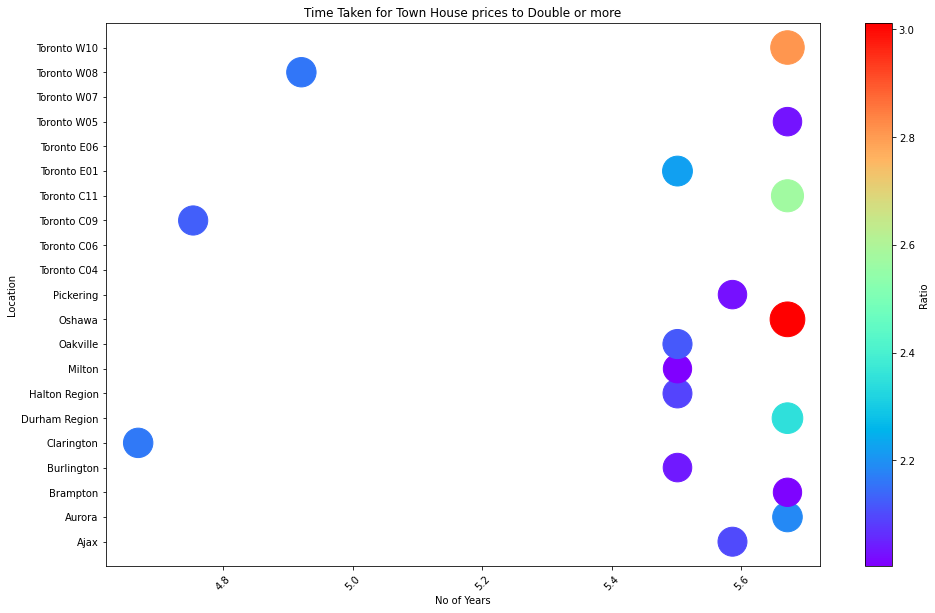

In [79]:
#  Combine into one dataframe
THouse = THouseMax.merge(THouseMin,on='Location',how='left',suffixes=('_Max', '_Min'))
THouse['Ratio']= THouse['THouseBenchmark_Max']/ THouse['THouseBenchmark_Min']
THouse

# filter dataframe where prices have doubled or more
THouse=THouse[THouse['Ratio']>=2]

# calculate time taken for prices to double or more
THouse['Duration']=THouse['Date_Max']-THouse['Date_Min']
THouse_Final =THouse[['Location','Ratio','Duration']]

# arrange data frame in decreasing order of number of times of price
THouse_Final.sort_values('Ratio', ascending =False)

# convert date time format of Duration column to string and extract number of days, convert it to number of years
THouse_Final['Duration']=THouse_Final['Duration'].astype('string')
THouse_Final[['No of days','days']]=THouse_Final.Duration.str.split(expand = True)
THouse_Final['No of days']=THouse_Final['No of days'].astype('int64')
THouse_Final=THouse_Final[['Location','Ratio','No of days']]
THouse_Final['No of Years']=THouse_Final['No of days']/365

# set ratio as size of the bubble for the plot
size_THouse=(THouse_Final['Ratio'])*400


# Plot the figure where number of years taken for property to double of more is plotted against location, bubble size is higher where price grew higher or ratio is higher 
THouse_Final.plot(kind="scatter", x="No of Years",y="Location", figsize=(16,10),title="Time Taken for Town House prices to Double or more", rot=45, style="o", c='Ratio', colormap='rainbow',s=size_THouse, sharex=False)

# Save the figure
plt.savefig("Images/Town_House.png")

# Display the figure
plt.show()

In [ ]:
# Analysis of Apartments

In [28]:
ApartMax  = mls_df_clean[["Location","ApartBenchmark","Date"]]
ApartMax  = ApartMax.sort_values(["Location","ApartBenchmark"], ascending=False)
ApartMax = ApartMax.groupby("Location").first().reset_index()
ApartMax

,Location,ApartBenchmark,Date
0,Adjala-Tosorontio,NaN,2015-07-01
1,Ajax,492300.0,2021-03-01
2,Aurora,583300.0,2021-03-01
3,Bradford West,NaN,2015-07-01
4,Bradford West Gwillimbury,NaN,2020-01-01
...,...,...,...
71,Uxbridge,NaN,2015-07-01
72,Vaughan,607100.0,2021-03-01
73,Whitby,517400.0,2021-03-01
74,Whitchurch-Stouffville,652200.0,2021-03-01


In [29]:
ApartMin  = mls_df_clean[["Location","ApartBenchmark","Date"]]
ApartMin  = ApartMin.sort_values(["Location","ApartBenchmark"], ascending=True)
ApartMin = ApartMin.groupby("Location").first().reset_index()
ApartMin

,Location,ApartBenchmark,Date
0,Adjala-Tosorontio,NaN,2015-07-01
1,Ajax,244500.0,2016-01-01
2,Aurora,339200.0,2015-11-01
3,Bradford West,NaN,2015-07-01
4,Bradford West Gwillimbury,NaN,2020-01-01
...,...,...,...
71,Uxbridge,NaN,2015-07-01
72,Vaughan,373300.0,2015-07-01
73,Whitby,290700.0,2016-01-01
74,Whitchurch-Stouffville,524800.0,2017-12-01


/var/folders/9b/5zr1_pkn3szbykw53vkw4vx40000gn/T/ipykernel_82699/208792741.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apart_Final['Duration']=Apart_Final['Duration'].astype('string')
/var/folders/9b/5zr1_pkn3szbykw53vkw4vx40000gn/T/ipykernel_82699/208792741.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apart_Final[['No of days','days']]=Apart_Final.Duration.str.split(expand = True)
/var/folders/9b/5zr1_pkn3szbykw53vkw4vx40000gn/T/ipykernel_82699/208792741.py:18: SettingWithCopyWarning: 
A v

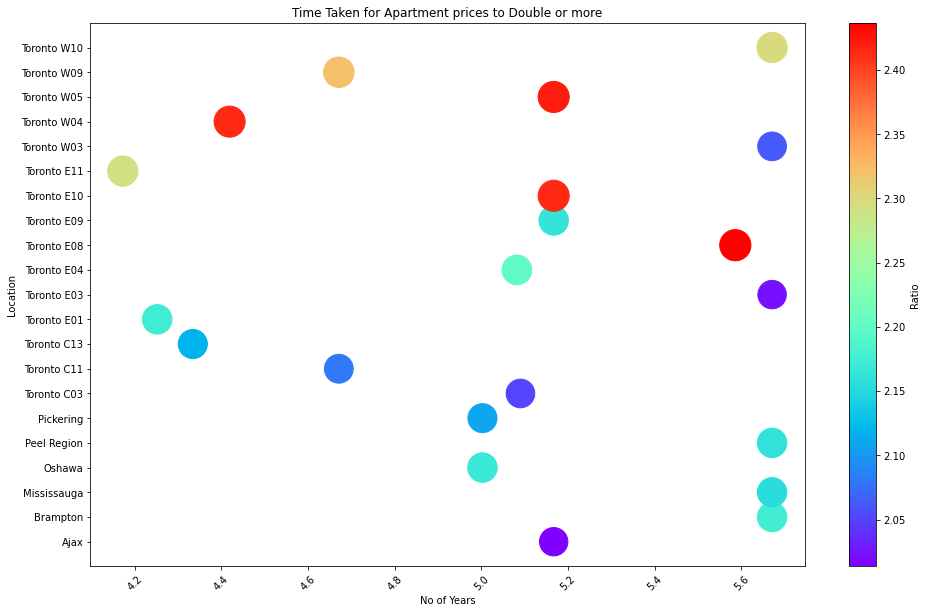

In [81]:
# Combine into one dataframe
Apart = ApartMax.merge(ApartMin,on='Location',how='left',suffixes=('_Max', '_Min'))
Apart['Ratio']= Apart['ApartBenchmark_Max']/ Apart['ApartBenchmark_Min']
Apart

# filter dataframe where prices have doubled or more
Apart=Apart[Apart['Ratio']>=2]

# calculate time taken for prices to double or more
Apart['Duration']=Apart['Date_Max']-Apart['Date_Min']
Apart_Final =Apart[['Location','Ratio','Duration']]

# arrange data frame in decreasing order of numbe of times of price
Apart_Final.sort_values('Ratio', ascending =False)

# convert date time format of duration to string and extract numbre of days, convert it to number of years
Apart_Final['Duration']=Apart_Final['Duration'].astype('string')
Apart_Final[['No of days','days']]=Apart_Final.Duration.str.split(expand = True)
Apart_Final['No of days']=Apart_Final['No of days'].astype('int64')
Apart_Final=Apart_Final[['Location','Ratio','No of days']]
Apart_Final['No of Years']=Apart_Final['No of days']/365

# set ratio as size of the bubble for the plot
size_apart =Apart_Final['Ratio'].astype('float')
size_apart=(Apart_Final['Ratio'])*400

# Plot the figure where number of years taken for property to double of more is plotted against location, bubble size is higher where price grew higher or ratio is higher 
Apart_Final.plot(kind="scatter", x="No of Years",y="Location", figsize=(16,10),title="Time Taken for Apartment prices to Double or more", rot=45, style="o", c='Ratio', colormap='rainbow',s=size_apart, sharex=False)

# Save the figure
plt.savefig("Images/Apartments.png")

# Display the figure
plt.show()


In [84]:

Apart_Final[['Location','Ratio','No of Years']]

,Location,Ratio,No of Years
1,Ajax,2.013497,5.167123
5,Brampton,2.175176,5.671233
24,Mississauga,2.154198,5.671233
29,Oshawa,2.168716,5.002740
30,Peel Region,2.159968,5.671233
31,Pickering,2.110209,5.002740
38,Toronto C03,2.050367,5.090411
45,Toronto C11,2.080518,4.671233
47,Toronto C13,2.119095,4.334247
50,Toronto E01,2.173277,4.252055
